In [2]:
import cv2
import pickle
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
%matplotlib inline

In [250]:
def getSobelGrads(img, axis="xy", K=9):
    grayImg = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    if axis == "x":
        xGrads = cv2.Sobel(grayImg, cv2.CV_64F, 1, 0, ksize=K)
        absXSobel = np.absolute(xGrads)
        return absXSobel
    elif axis == "y":
        yGrads = cv2.Sobel(grayImg, cv2.CV_64F, 0, 1, ksize=K)
        absYSobel = np.absolute(yGrads)
        return absYSobel
    elif axis == "xy":
        xGrads = cv2.Sobel(grayImg, cv2.CV_64F, 1, 0, ksize=K)
        yGrads = cv2.Sobel(grayImg, cv2.CV_64F, 0, 1, ksize=K)
        absXSobel = np.absolute(xGrads)
        absYSobel = np.absolute(yGrads)
        return absXSobel, absYSobel

    
def getSobelMag(absGrads, minThresh, maxThresh):
    if isinstance(absGrads, (list, tuple, np.ndarray)) and len(absGrads)==2:
        absXSobel, absYSobel = absGrads
        sobelMag = np.sqrt(np.square(absXSobel) + np.square(absYSobel))
        sobelMag = np.uint8(sobelMag * 255 / np.max(sobelMag))
        edgesMask = np.zeros_like(sobelMag)
        edgesMask[(sobelMag > minThresh) & (sobelMag < maxThresh)] = 1
        return edgesMask
    else:
        sobelMag = np.sqrt(np.square(absGrads))
        sobelMag = np.uint8(sobelMag * 255 / np.max(sobelMag))
        edgesMask = np.zeros_like(sobelMag)
        edgesMask[(sobelMag > minThresh) & (sobelMag < maxThresh)] = 1
        return edgesMask

def getSobelDir(absXSobel, absYSobel, minThresh, maxThresh):
    sobelMag = np.arctan2(absYSobel, absXSobel)
    edgesMask = np.zeros_like(sobelMag)
    edgesMask[(sobelMag >= minThresh) & (sobelMag <= maxThresh)] = 1
    return edgesMask

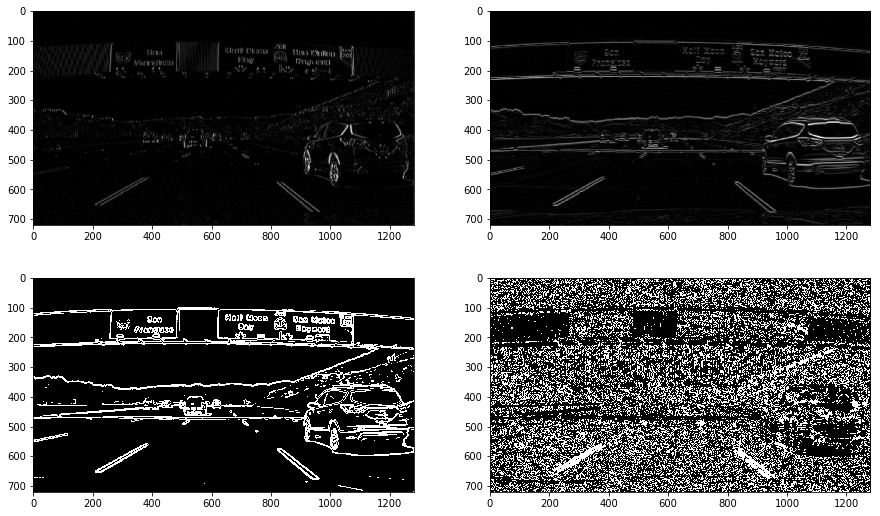

In [251]:
img = plt.imread("./xyGrads.png")
fig = plt.figure(figsize=(15, 9))
xGrads, yGrads = getSobelGrads(img, "xy", K=15)
magMask = getSobelMag([xGrads, yGrads], 33, 155)
dirMask = getSobelDir(xGrads, yGrads, 0.75, 1.3)

axis = fig.add_subplot(2, 2, 1)
axis.imshow(xGrads, "gray")
axis = fig.add_subplot(2, 2, 2)
axis.imshow(yGrads, "gray")
axis = fig.add_subplot(2, 2, 3)
axis.imshow(magMask, "gray")
axis = fig.add_subplot(2, 2, 4)
axis.imshow(dirMask, "gray")

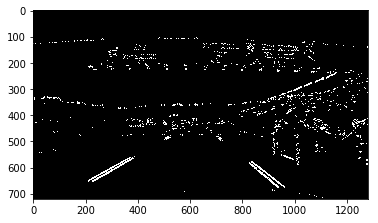

In [252]:
edgesMask = np.zeros_like(magMask)
edgesMask[((xGrads == 1) & (yGrads ==1)) | ((magMask == 1) & (dirMask ==1))] = 1
plt.imshow(edgesMask, "gray")

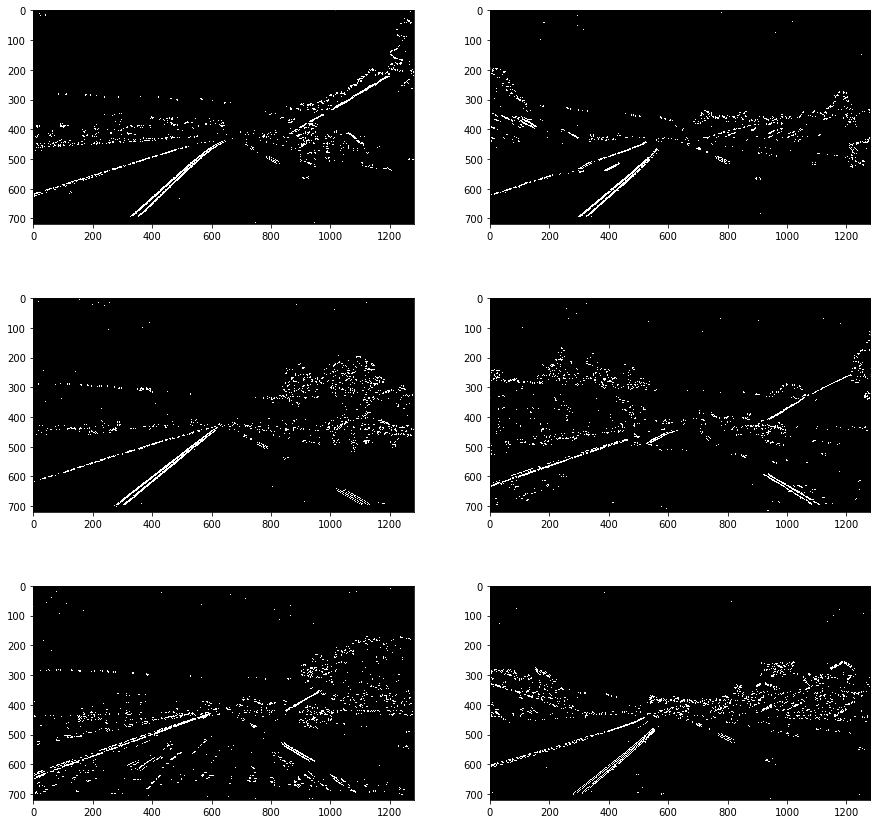

In [253]:
fig = plt.figure(figsize=(15, 15))
imgsPaths = glob("./edge_thresh_calib/*.jpg")
for i, imgPath in enumerate(imgsPaths):
    img = plt.imread(imgPath)
    xGrads, yGrads = getSobelGrads(img, "xy", K=15)
    magMask = getSobelMag([xGrads, yGrads], 33, 155)
    dirMask = getSobelDir(xGrads, yGrads, 0.75, 1.3)
    edgesMask = np.zeros_like(magMask)
    edgesMask[((xGrads == 1) & (yGrads ==1)) | ((magMask == 1) & (dirMask ==1))] = 1
    axis = fig.add_subplot(len(imgsPaths)//2, 2, i+1)
    axis.imshow(edgesMask, "gray")